# Import libraries

In [65]:
%matplotlib inline

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Import and describe Dataset EDA (Exploratory Data Analysis)

In [66]:
# Import Dataframe named 'data_shops'
data_shops = pd.read_csv('../data/sales - sales.csv')
data_shops

,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,425390,366,4,2013-04-18,517,1,0,0,0,4422
1,291687,394,6,2015-04-11,694,1,0,0,0,8297
2,411278,807,4,2013-08-29,970,1,1,0,0,9729
3,664714,802,2,2013-05-28,473,1,1,0,0,6513
4,540835,726,4,2013-10-10,1068,1,1,0,0,10882
...,...,...,...,...,...,...,...,...,...,...
640835,359783,409,6,2013-10-26,483,1,0,0,0,4553
640836,152315,97,1,2014-04-14,987,1,1,0,0,12307
640837,117952,987,1,2014-07-07,925,1,0,0,0,6800
640838,435829,1084,4,2014-06-12,725,1,0,0,0,5344


In [67]:
# Column names 
print("The dataset has the following columns:") 
for col in data_shops.columns:
    print(col)

The dataset has the following columns:
Unnamed: 0
store_ID
day_of_week
date
nb_customers_on_day
open
promotion
state_holiday
school_holiday
sales


In [68]:
# Drop the Unnamed column
data_shops.drop("Unnamed: 0", axis=1, inplace=True)

In [69]:
# Shape
print(f"The dataset has shape {data_shops.shape}")

The dataset has shape (640840, 9)


In [70]:
# First five rows
print("The first five rows of the data are: ")
print(data_shops.head())

The first five rows of the data are: 
   store_ID  day_of_week        date  nb_customers_on_day  open  promotion  \
0       366            4  2013-04-18                  517     1          0   
1       394            6  2015-04-11                  694     1          0   
2       807            4  2013-08-29                  970     1          1   
3       802            2  2013-05-28                  473     1          1   
4       726            4  2013-10-10                 1068     1          1   

  state_holiday  school_holiday  sales  
0             0               0   4422  
1             0               0   8297  
2             0               0   9729  
3             0               0   6513  
4             0               0  10882  


In [71]:
# Info 
print("Dataset info: ")
print(data_shops.info())

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   store_ID             640840 non-null  int64 
 1   day_of_week          640840 non-null  int64 
 2   date                 640840 non-null  object
 3   nb_customers_on_day  640840 non-null  int64 
 4   open                 640840 non-null  int64 
 5   promotion            640840 non-null  int64 
 6   state_holiday        640840 non-null  object
 7   school_holiday       640840 non-null  int64 
 8   sales                640840 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 44.0+ MB
None


In [72]:
# Describe
print("Describe the dataset: ")
print(data_shops.describe())

Describe the dataset: 
            store_ID    day_of_week  nb_customers_on_day           open  \
count  640840.000000  640840.000000        640840.000000  640840.000000   
mean      558.211348       4.000189           633.398577       0.830185   
std       321.878521       1.996478           464.094416       0.375470   
min         1.000000       1.000000             0.000000       0.000000   
25%       280.000000       2.000000           405.000000       1.000000   
50%       558.000000       4.000000           609.000000       1.000000   
75%       837.000000       6.000000           838.000000       1.000000   
max      1115.000000       7.000000          5458.000000       1.000000   

           promotion  school_holiday          sales  
count  640840.000000   640840.000000  640840.000000  
mean        0.381718        0.178472    5777.469011  
std         0.485808        0.382910    3851.338083  
min         0.000000        0.000000       0.000000  
25%         0.000000        0.0

In [73]:
# Check null values
print("Missing values per column: ")
null_values = data_shops.isnull().sum()
print(null_values)

Missing values per column: 
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [74]:
# Check datatypes
data_shops.dtypes

store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [75]:
# Convert 'state_holiday' to numeric 
data_shops["state_holiday"] = data_shops["state_holiday"].astype(str).map({
    '0': 0,
    'a': 1,
    'b': 1,
    'c': 1
})

In [76]:
# Split 'date' into 'Year', 'Month', 'Day'
data_shops['date'] = pd.to_datetime(data_shops['date'])
data_shops['year'] = data_shops['date'].dt.year
data_shops['month'] = data_shops['date'].dt.month
data_shops['day'] = data_shops['date'].dt.day
data_shops.drop("date", axis=1, inplace=True)
data_shops

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,366,4,517,1,0,0,0,4422,2013,4,18
1,394,6,694,1,0,0,0,8297,2015,4,11
2,807,4,970,1,1,0,0,9729,2013,8,29
3,802,2,473,1,1,0,0,6513,2013,5,28
4,726,4,1068,1,1,0,0,10882,2013,10,10
...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,4553,2013,10,26
640836,97,1,987,1,1,0,0,12307,2014,4,14
640837,987,1,925,1,0,0,0,6800,2014,7,7
640838,1084,4,725,1,0,0,0,5344,2014,6,12


In [77]:
# Check for incorrect data points 
impossible_sales = data_shops[(data_shops['open'] == 0) & (data_shops['sales'] > 0)]
impossible_sales

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day


In [78]:
# Days when store is open, but no sales
no_sales = data_shops[(data_shops['open'] == 1) & (data_shops['sales'] == 0)] # Consider removing these data points

In [79]:
# Drop data points where the store is closed
# data_shops = data_shops[data_shops["open"] == 1]

<Axes: xlabel='nb_customers_on_day', ylabel='sales'>

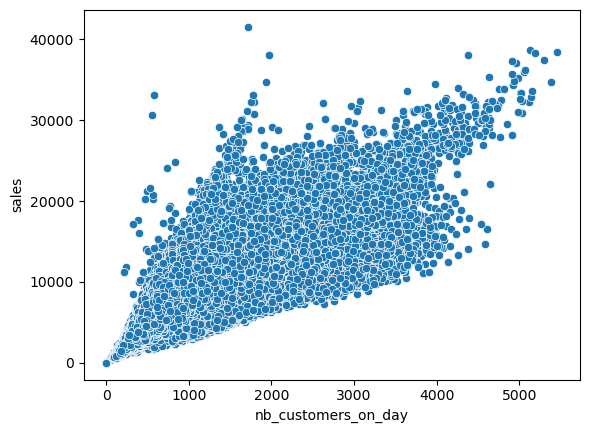

In [80]:
# Check correlation between number of customers and sales
sns.scatterplot(x=data_shops["nb_customers_on_day"], y=data_shops["sales"])

/var/folders/gn/wg9xjv455tj2c2jns2j4b8yw0000gn/T/ipykernel_60198/564311192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_day.index, y=avg_sales_day.values, palette='magma')


Text(0, 0.5, 'Average Sales')

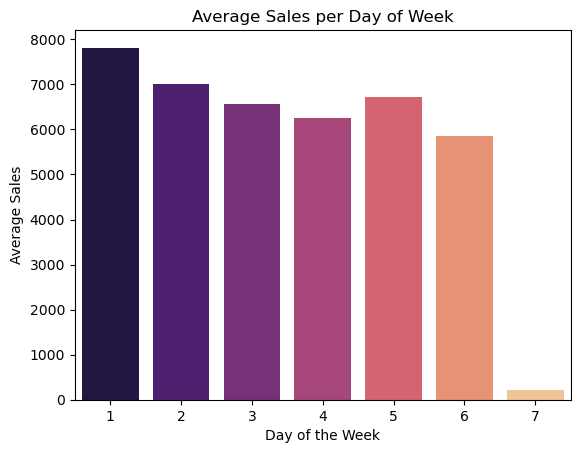

In [81]:
# Average sales per day of week 
avg_sales_day = data_shops.groupby('day_of_week')['sales'].mean()
sns.barplot(x=avg_sales_day.index, y=avg_sales_day.values, palette='magma')
plt.title("Average Sales per Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Sales")

Text(0.5, 1.0, 'Distribution of Customers (with Outliers)')

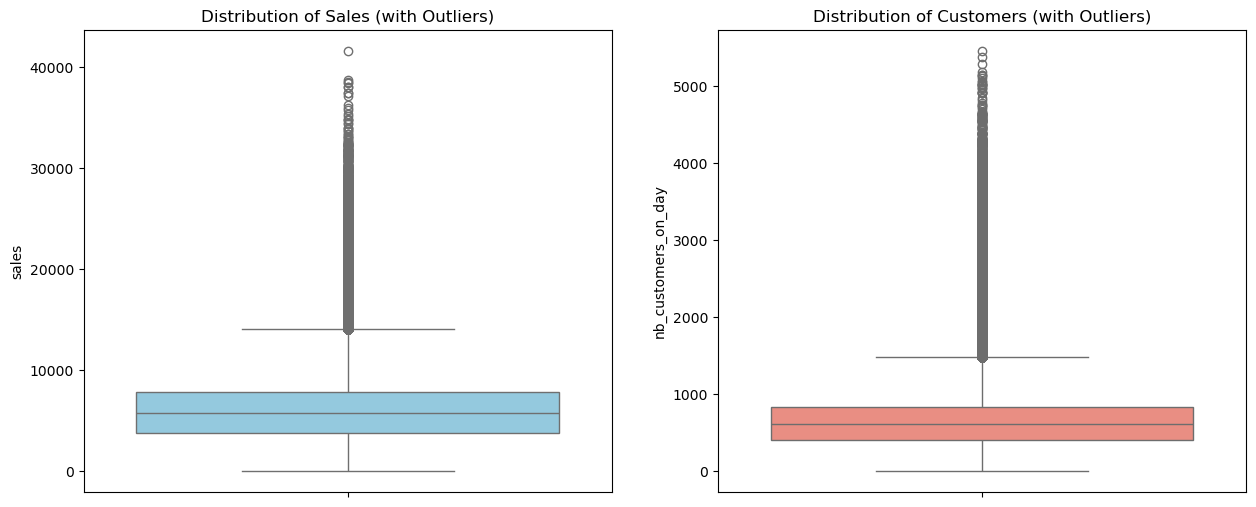

In [82]:
# Outlier detection
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(data=data_shops, y='sales', ax=axes[0], color='skyblue')
sns.boxplot(data=data_shops, y='nb_customers_on_day', ax=axes[1], color='salmon')
axes[0].set_title('Distribution of Sales (with Outliers)')
axes[1].set_title('Distribution of Customers (with Outliers)')

<Axes: >

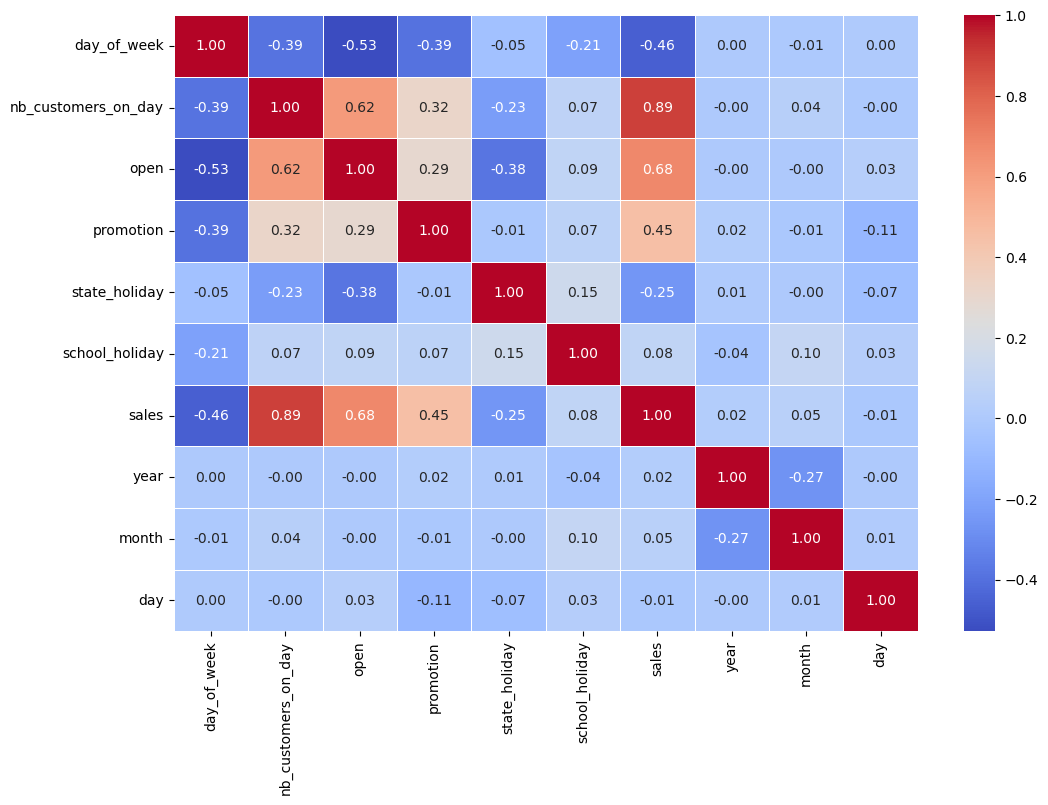

In [83]:
# Explore correlation between features
cols_to_check = ['day_of_week', 'nb_customers_on_day', 'open', 
                 'promotion', 'state_holiday', 'school_holiday', 'sales', 'year', 'month', 'day']

corr_matrix = data_shops[cols_to_check].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [84]:
# Calculate average sales per store
store_means = data_shops.groupby('store_ID')['sales'].mean()

In [85]:
from sklearn.linear_model import LinearRegression


X = data_shops.drop(['sales', 'state_holiday', 'school_holiday'], axis=1)
y = data_shops['sales']

# Split, training and testing


In [91]:
# Split, training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train['store_avg_sales'] = X_train['store_ID'].map(store_means)
X_test['store_avg_sales'] = X_test['store_ID'].map(store_means)

# Drop the 'store ID' column
X_train.drop("store_ID", axis=1, inplace=True)
X_test.drop("store_ID", axis=1, inplace=True)
X_train
# Test without the 'nb_customers_day' column
# X_train.drop("nb_customers_on_day", axis=1, inplace=True)
# X_test.drop("nb_customers_on_day", axis=1, inplace=True)


,day_of_week,nb_customers_on_day,open,promotion,year,month,day,store_avg_sales
360184,3,680,1,1,2015,7,29,6263.595092
162306,3,1125,1,0,2014,5,28,8936.604377
80802,2,936,1,1,2015,2,3,4033.586505
607893,2,938,1,1,2015,7,28,6667.803630
606656,4,410,1,0,2013,3,14,5014.106908
...,...,...,...,...,...,...,...,...
110268,4,1040,1,0,2014,1,2,8404.254839
259178,1,714,1,1,2015,3,16,5062.348460
365838,4,0,0,0,2015,1,1,3844.319149
131932,5,0,0,1,2013,3,29,7554.012007


# Training Linear Regression

In [87]:
# Training
lr_data_shops = LinearRegression()
lr_data_shops.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Prediction & R-score

In [88]:
# Prediction
y_pred_lr = lr_data_shops.predict(X_test)

r2lr = r2_score(y_test, y_pred_lr)
print(f"R-score: {r2lr*100:.2f}%")

R-score: 87.75%


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Train the model
rf_data_shops = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_data_shops.fit(X_train, y_train)

y_pred_rf = rf_data_shops.predict(X_test)
r2rf = r2_score(y_test, y_pred_rf)
print(f"R-score: {r2rf*100:.2f}%")

# Sanity check - r2 score for training data 
r2rftrain = r2_score(y_train, rf_data_shops.predict(X_train))
print(f"R-score for training set: {r2rftrain*100:.2f}%")

# Run cross-validation
scores = cross_val_score(rf_data_shops, X_train, y_train, cv=5, scoring='r2')

print(f"All CV Scores: {scores}")
print(f"Mean R2: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

R-score: 95.95%
R-score for training set: 96.85%
All CV Scores: [0.95932386 0.96076468 0.95924901 0.95909733 0.95809166]
Mean R2: 0.9593
Standard Deviation: 0.0009


In [90]:
# Train the model on all of our data 
rf_data_shops.fit(X, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",15
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [ ]:
# Make predictions on REAL DATA
real_data = pd.read_csv("../data/REAL_DATA.csv")

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,415,7,01/03/2015,0,0,0,0,0
1,27,7,29/12/2013,0,0,0,0,0
2,404,3,19/03/2014,657,1,1,0,0
3,683,2,29/01/2013,862,1,0,0,0
4,920,3,19/03/2014,591,1,1,0,0
...,...,...,...,...,...,...,...,...
71200,441,7,26/10/2014,0,0,0,0,0
71201,377,7,18/08/2013,0,0,0,0,0
71202,15,3,11/06/2014,648,1,0,0,0
71203,950,2,23/04/2013,626,1,1,0,0
